# Customer Churn Prediction Model

### 1. Data Collection

In [1]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read and print data
customer_churn = pd.read_csv("customer_churn_large_dataset.csv")

customer_churn

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


### 2. Data Preprocessing

<li>Clean the data by handling missing values, outliers, and inconsistencies.


In [3]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


**We can see that we have 6 numerical and 3 categorical columns**

In [4]:
#it is clear that our dataset does not have any null values, still we can also check it using:
customer_churn.isna().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

**We do not have any null values**

In [5]:
# Check for duplicate rows in dataset based on CustomerId column

duplicate = customer_churn[customer_churn.duplicated('CustomerID', keep = False)]
print(duplicate)
#empty dataframe represents that there are no duplicates in our dataset

Empty DataFrame
Columns: [CustomerID, Name, Age, Gender, Location, Subscription_Length_Months, Monthly_Bill, Total_Usage_GB, Churn]
Index: []


**We do not have any duplicate values, so now we can drop CustomerID, Name attributes as they does not contribute anything to our analysis**

In [6]:
#drop customerID and name attributes from dataframe
customer_churn.drop(['CustomerID', 'Name'], axis = 1, inplace = True)
customer_churn.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


In [7]:
#first creating a list of numerical attributes of dataframe

numerical = customer_churn.select_dtypes(include='number')
numerical = list(numerical.columns)
print(numerical)

['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB', 'Churn']


In [8]:
#first creating a list of categorical attributes of dataframe

categorical = customer_churn.select_dtypes(exclude='number')
categorical = list(categorical.columns)
print(categorical)

['Gender', 'Location']


#### Let us understand distribution of values in our numerical column

C:\Users\CYF\AppData\Local\Temp\ipykernel_17860\3475168760.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_churn[column],rug = True)


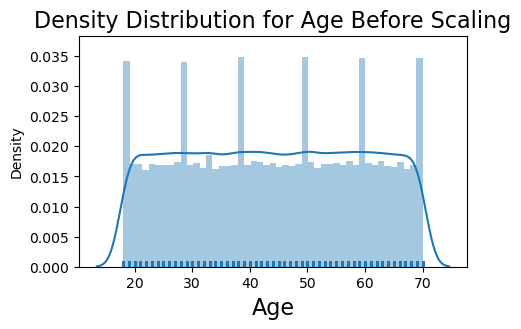

C:\Users\CYF\AppData\Local\Temp\ipykernel_17860\3475168760.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_churn[column],rug = True)


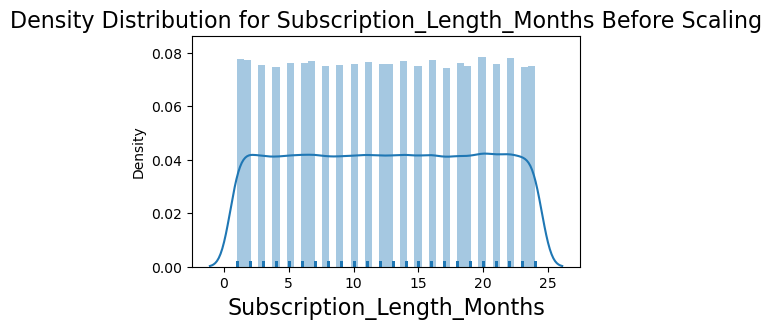

C:\Users\CYF\AppData\Local\Temp\ipykernel_17860\3475168760.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_churn[column],rug = True)


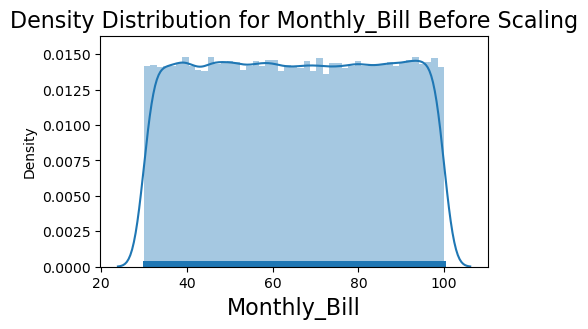

C:\Users\CYF\AppData\Local\Temp\ipykernel_17860\3475168760.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_churn[column],rug = True)


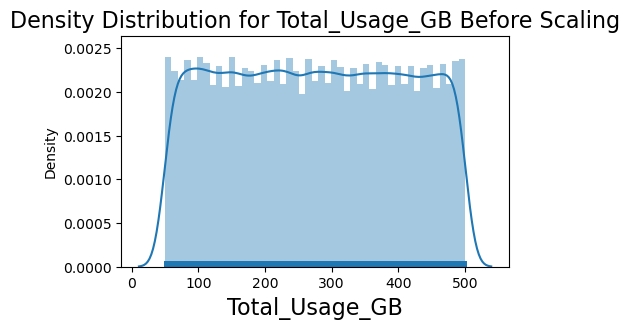

C:\Users\CYF\AppData\Local\Temp\ipykernel_17860\3475168760.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_churn[column],rug = True)


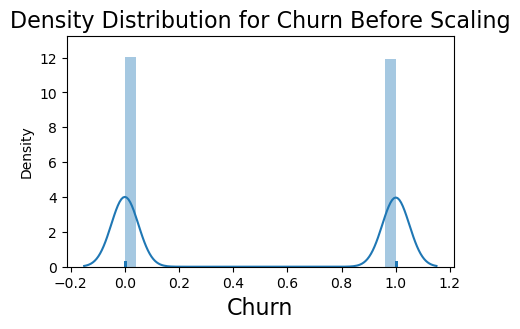

In [9]:
#Defining a function to plot distribution

def plot_density_distribution(column, title, xLabel) : 
    plt.figure(figsize=(5,3))
    sns.distplot(customer_churn[column],rug = True)
    plt.title(f'Density Distribution for {title} Before Scaling',fontsize=16)
    plt.xlabel(xLabel,fontsize=16)
    plt.show()
    
for i in numerical:
    plot_density_distribution(i, i, i)

#### Looking for multicollinearity in our data


C:\Users\CYF\AppData\Local\Temp\ipykernel_17860\3678116236.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = customer_churn.corr()


<Axes: >

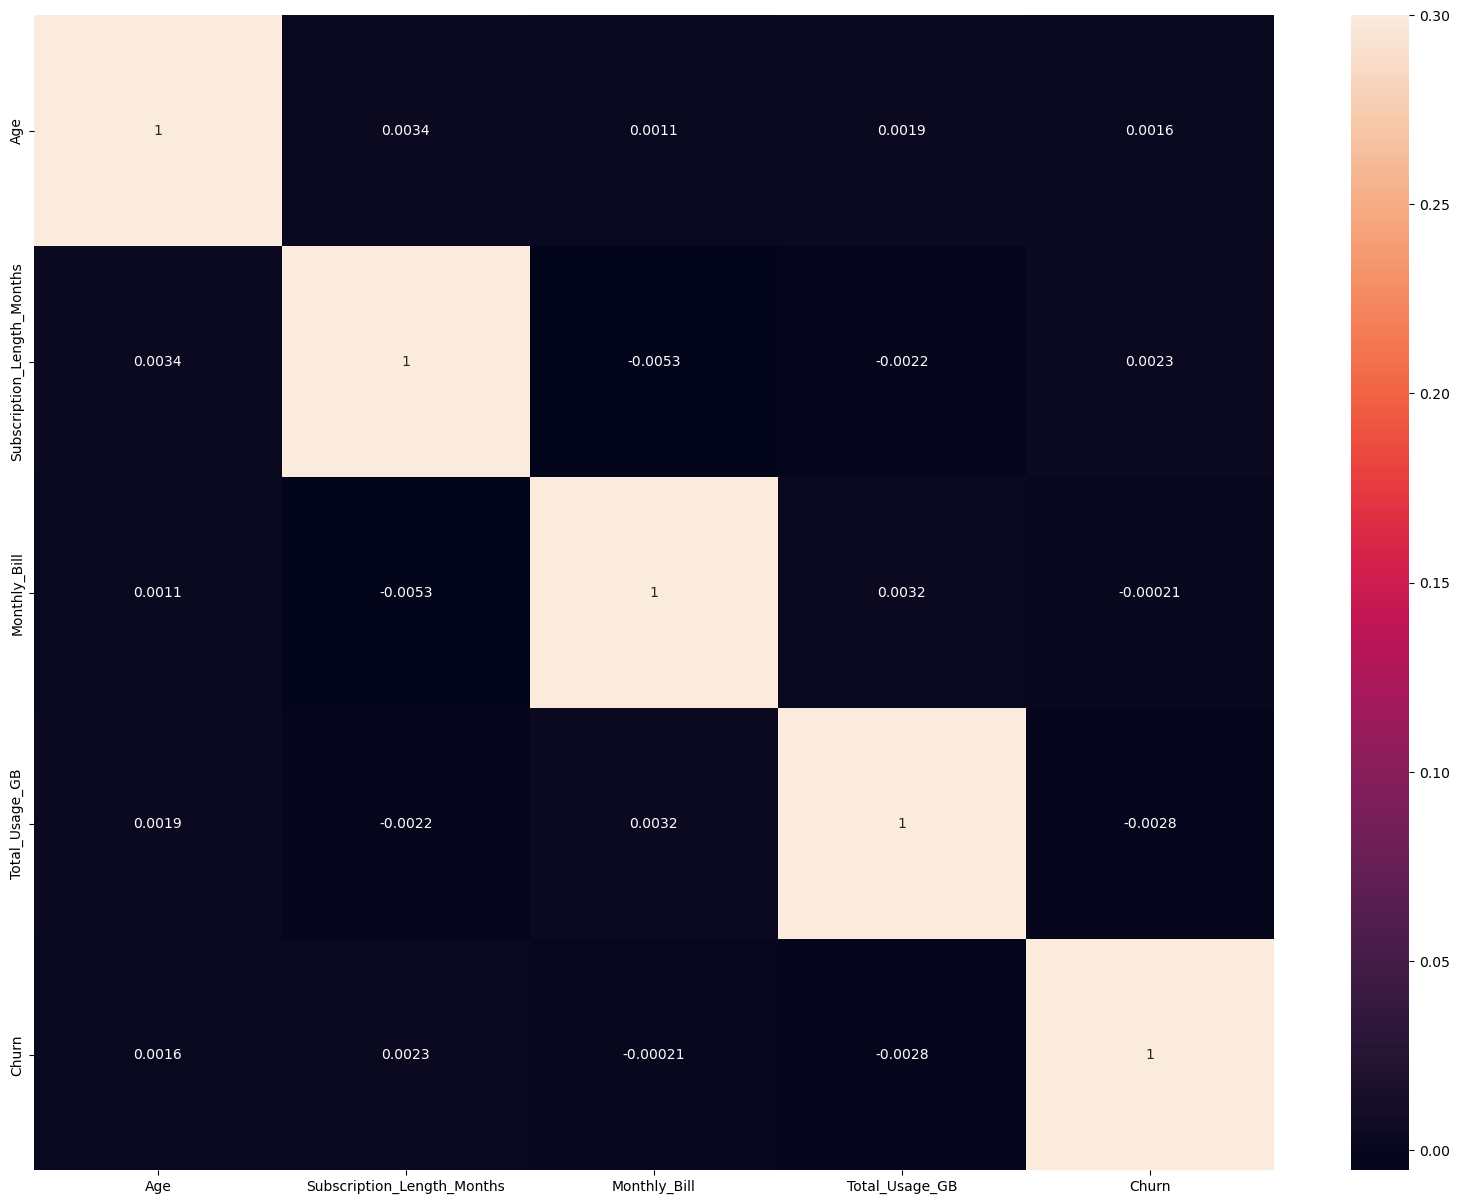

In [10]:
#To identify correlation between all variables of the dataset and see which variables are negativey impacting loan_status variable
f, ax = plt.subplots(figsize=(20, 15))
corr = customer_churn.corr()
sns.heatmap(corr,  vmax=.3, annot=True)

**No multicollinearity in our dataset, so all the remaining columns of our dataset are equally important for predicting our class variable**

### 3. Feature Engineering

<li>Select relevant features that are likely to impact customer churn. This may involve domain knowledge or using feature selection techniques.
<li>Create new features that may provide insights, such as customer tenure, average transaction frequency, or customer satisfaction scores.

#### Label the Locations & Gender

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
label = LabelEncoder()
customer_churn.Gender = label.fit_transform(customer_churn.Gender)
customer_churn = pd.get_dummies(customer_churn)
print(customer_churn.head())

   Age  Gender  Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  \
0   63       1                          17         73.36             236   
1   62       0                           1         48.76             172   
2   24       0                           5         85.47             460   
3   36       0                           3         97.94             297   
4   46       0                          19         58.14             266   

   Churn  Location_Chicago  Location_Houston  Location_Los Angeles  \
0      0                 0                 0                     1   
1      0                 0                 0                     0   
2      0                 0                 0                     1   
3      1                 0                 0                     0   
4      0                 0                 0                     0   

   Location_Miami  Location_New York  
0               0                  0  
1               0                  1  
2    

#### Applying minmax Normaliztion on all numerical data

In [13]:
scale_cols = ['Age','Subscription_Length_Months','Total_Usage_GB', 'Monthly_Bill']
from sklearn.preprocessing import MinMaxScaler

In [14]:
scale = MinMaxScaler()
customer_churn[scale_cols] = scale.fit_transform(customer_churn[scale_cols])
customer_churn

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,0.865385,1,0.695652,0.619429,0.413333,0,0,0,1,0,0
1,0.846154,0,0.000000,0.268000,0.271111,0,0,0,0,0,1
2,0.115385,0,0.173913,0.792429,0.911111,0,0,0,1,0,0
3,0.346154,0,0.086957,0.970571,0.548889,1,0,0,0,1,0
4,0.538462,0,0.782609,0.402000,0.480000,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,0.288462,1,0.956522,0.359000,0.391111,1,0,1,0,0,0
99996,0.846154,0,0.782609,0.452143,0.668889,0,0,0,0,0,1
99997,0.884615,1,0.695652,0.944429,0.446667,1,1,0,0,0,0
99998,0.634615,0,0.826087,0.275000,0.853333,1,0,0,0,0,1


#### Let us understand distribution of values in our new numerical columns

C:\Users\CYF\AppData\Local\Temp\ipykernel_17860\1705388138.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_churn[column],rug = True)


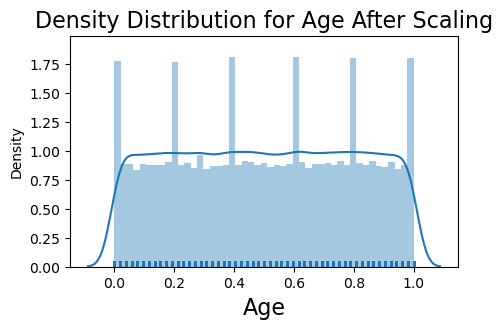

C:\Users\CYF\AppData\Local\Temp\ipykernel_17860\1705388138.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_churn[column],rug = True)


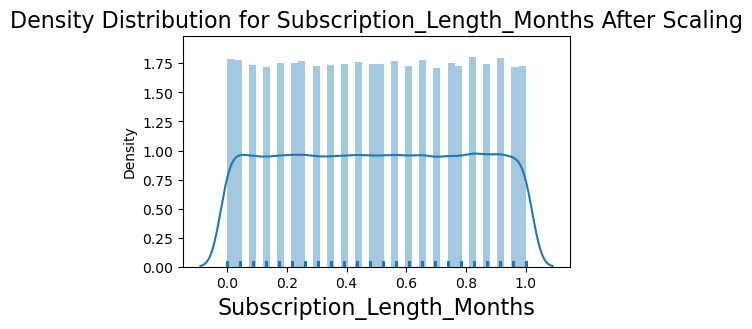

C:\Users\CYF\AppData\Local\Temp\ipykernel_17860\1705388138.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_churn[column],rug = True)


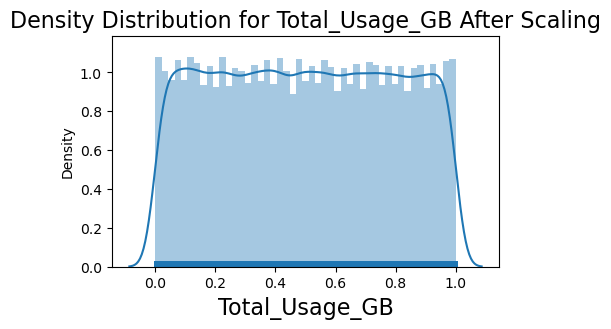

C:\Users\CYF\AppData\Local\Temp\ipykernel_17860\1705388138.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_churn[column],rug = True)


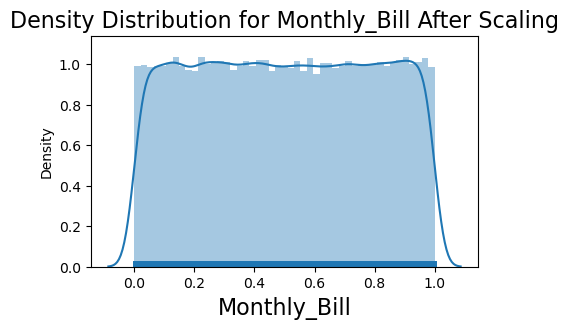

In [15]:
def plot_density_distribution(column, title, xLabel) : 
    plt.figure(figsize=(5,3))
    sns.distplot(customer_churn[column],rug = True)
    plt.title(f'Density Distribution for {title} After Scaling',fontsize=16)
    plt.xlabel(xLabel,fontsize=16)
    plt.show()
    
for i in scale_cols:
    plot_density_distribution(i, i, i)

### 4. Data Splitting

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = customer_churn.drop(columns = ['Churn'])
y = customer_churn['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

### 5. Model Building & Training

#### Logistic Regression Model

In [18]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

lr_pred= lr_model.predict(X_test)

#### AdaBoostClassifier Model

In [19]:
from sklearn.ensemble import AdaBoostClassifier

a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)

a_preds = a_model.predict(X_test)

#### Random Forest Classifier Model

In [20]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

prediction_test = model_rf.predict(X_test)

#### Decision Tree Classifier Model

In [21]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)


predictdt_y = dt_model.predict(X_test)

#### KNN Model

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 11) 
knn_model.fit(X_train,y_train)


predicted_y = knn_model.predict(X_test)

### 6. Accuracy Comparison

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### Logistic Regression

In [24]:
accuracy = accuracy_score(y_test, lr_pred)
confusion = confusion_matrix(y_test, lr_pred)
classification_report_str = classification_report(y_test, lr_pred)

In [25]:
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(classification_report_str)

Accuracy: 0.50
Confusion Matrix:
[[9624 5442]
 [9599 5335]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.64      0.56     15066
           1       0.50      0.36      0.41     14934

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.49     30000
weighted avg       0.50      0.50      0.49     30000



#### AdaBoost

In [26]:
accuracy = accuracy_score(y_test, a_preds)
confusion = confusion_matrix(y_test, a_preds)
classification_report_str = classification_report(y_test, a_preds)

In [27]:
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(classification_report_str)

Accuracy: 0.50
Confusion Matrix:
[[8550 6516]
 [8591 6343]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.57      0.53     15066
           1       0.49      0.42      0.46     14934

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.49     30000
weighted avg       0.50      0.50      0.49     30000



#### Random Forest

In [28]:
accuracy = accuracy_score(y_test, prediction_test)
confusion = confusion_matrix(y_test, prediction_test)
classification_report_str = classification_report(y_test, prediction_test)

In [29]:
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(classification_report_str)

Accuracy: 0.50
Confusion Matrix:
[[9940 5126]
 [9865 5069]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.66      0.57     15066
           1       0.50      0.34      0.40     14934

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.49     30000
weighted avg       0.50      0.50      0.49     30000



#### Decision Tree

In [30]:
accuracy = accuracy_score(y_test, predictdt_y)
confusion = confusion_matrix(y_test, predictdt_y)
classification_report_str = classification_report(y_test, predictdt_y)

In [31]:
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(classification_report_str)

Accuracy: 0.51
Confusion Matrix:
[[7580 7486]
 [7276 7658]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.50      0.51     15066
           1       0.51      0.51      0.51     14934

    accuracy                           0.51     30000
   macro avg       0.51      0.51      0.51     30000
weighted avg       0.51      0.51      0.51     30000



#### KNN

In [32]:
accuracy = accuracy_score(y_test, predicted_y)
confusion = confusion_matrix(y_test, predicted_y)
classification_report_str = classification_report(y_test, predicted_y)

In [33]:
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(classification_report_str)

Accuracy: 0.50
Confusion Matrix:
[[7613 7453]
 [7528 7406]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.51      0.50     15066
           1       0.50      0.50      0.50     14934

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000



### 9. Model Deployment

In [34]:
import joblib

# Export the trained model
joblib.dump(model_rf, 'churn_model.pkl')

['churn_model.pkl']

### Code for Deployment Server

In [ ]:
from flask import Flask, request, jsonify
import pandas as pd
import joblib

def predict_churn(new_customer_data):
    # Load the trained label encoders
    label_encoders = joblib.load('label_encoders.pkl')

    # Create a DataFrame from the new customer data (assuming it's a dictionary)
    new_customer_df = pd.DataFrame([new_customer_data])

    # Remove 'customerID' and 'name' columns if they exist
    new_customer_df = new_customer_df.drop(['customerID', 'name'], axis=1, errors='ignore')

    # Apply label encoding to categorical columns
    for col, le in label_encoders.items():
        new_customer_df[col] = le.transform(new_customer_df[col])

    # Make predictions using the loaded model
    churn_prediction = model.predict(new_customer_df)

    return churn_prediction

app = Flask(__name__)

@app.route('/predict_churn', methods=['POST'])
def predict_churn_route():
    new_customer_data = request.json  # Assuming you send JSON data

    # Call the predict_churn function to make predictions
    churn_prediction = predict_churn(new_customer_data)

    return jsonify({'churn_prediction': int(churn_prediction)})


if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)  # Change host and port as needed


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.29.81:5000
Press CTRL+C to quit


### Code for Sending Data and Retrieving Prediction from the Server

In [ ]:
import requests

# Example input data
new_customer_data = {
    'Age': 30,
    'Gender': 0,  # Female
    'Subscription_Length_Months': 10,
    'Monthly_Bill': 60.0,
    'Total_Usage_GB': 300
}

# Make a POST request to the API
# Assuming you have the response object from the POST request
response = requests.post('http://localhost:5000/predict_churn', json=new_customer_data)

# Check if the 'churn_prediction' key exists in the response
if 'churn_prediction' in response.json():
    prediction = response.json()['churn_prediction']
    print(f'Churn Prediction: {prediction}')
else:
    print('Key not found in the response:', response.json())
